In [132]:
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#supress display of warnings
import warnings
warnings.filterwarnings('ignore')

In [133]:
data = pd.read_csv('spam.txt', sep = '\t', names =['label', 'message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [134]:
data.shape

(5572, 2)

In [135]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [136]:
data.duplicated().sum()

np.int64(403)

In [137]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [138]:
data.shape

(5169, 2)

## Data Exploration and Analysis

In [139]:
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

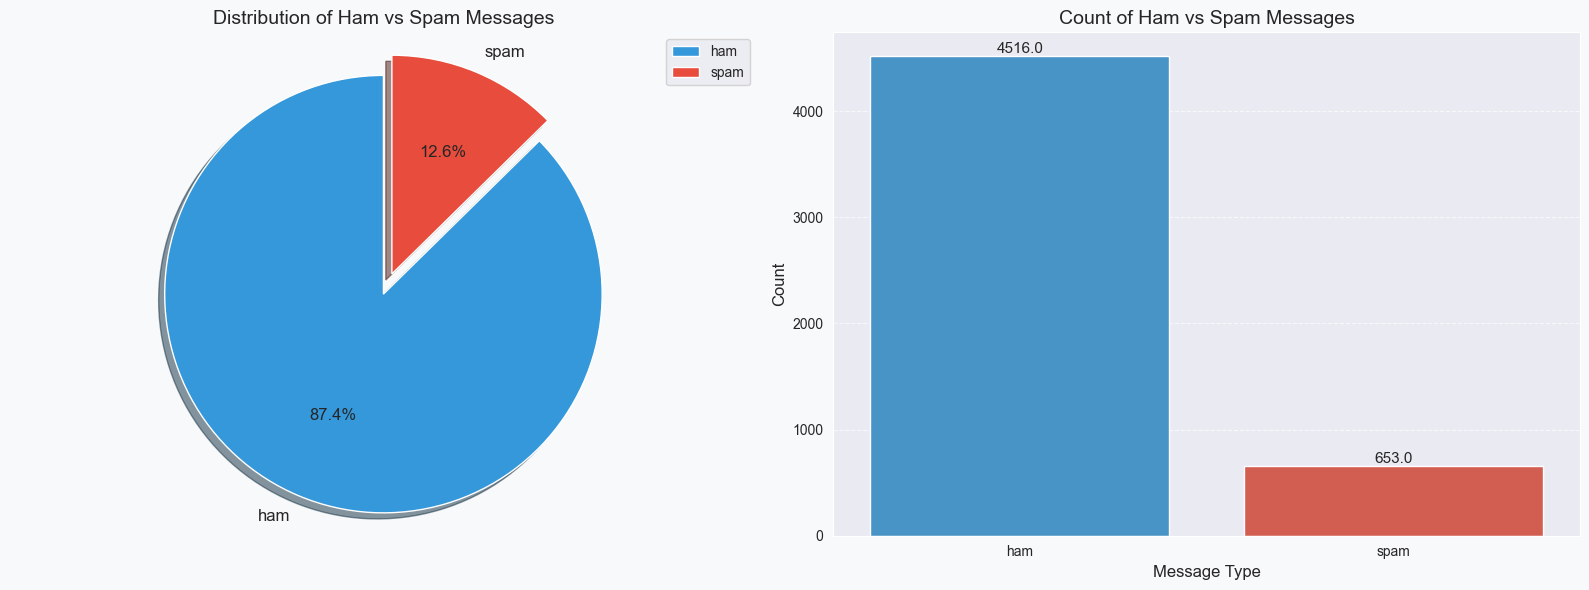

In [140]:
 # Create both visualizations side by side with vibrant colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define vibrant, pleasing colors
ham_color = '#3498db'  # Bright blue
spam_color = '#e74c3c'  # Vibrant red
colors = [ham_color, spam_color]

# Pie chart
labels = data['label'].value_counts().index
sizes = data['label'].value_counts().values
explode = (0, 0.1)  # explode the 2nd slice (spam)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')
ax1.set_title('Distribution of Ham vs Spam Messages', fontsize=14)
ax1.legend(labels, loc="upper right")

# Bar chart
sns.countplot(x='label', data=data, palette=colors, ax=ax2)

# Add count labels on top of bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

ax2.set_title('Count of Ham vs Spam Messages', fontsize=14)
ax2.set_xlabel('Message Type', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color to enhance visual appeal
fig.set_facecolor('#f8f9fa')  # Light gray background
plt.tight_layout()
plt.show()

##### Highly imbalanced distribution of your spam vs ham messages. The data shows a significant class imbalance (approximately 87% ham vs 13% spam), which is important information for any machine learning model you might build.


In [141]:
data['num_character'] = data['message'].apply(len)
data.head()

,label,message,num_character
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [142]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adityakumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/adityakumar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityakumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adityakumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/adityakumar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [143]:
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [144]:
data['num_words'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,label,message,num_character,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [145]:
data['num_sentences'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,label,message,num_character,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [146]:
data[data['label'] == 'ham'][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [147]:
data[data['label'] == 'spam'][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


#### Clearly ham messages is longer than spam messages

<Axes: xlabel='num_character', ylabel='Count'>

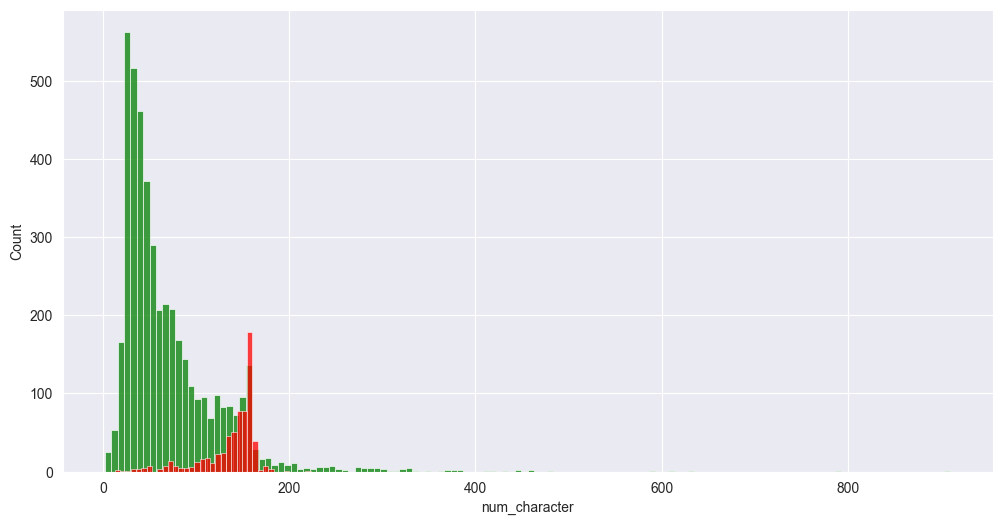

In [148]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['label'] == 'ham']['num_character'], color = 'green')
sns.histplot(data[data['label'] == 'spam']['num_character'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

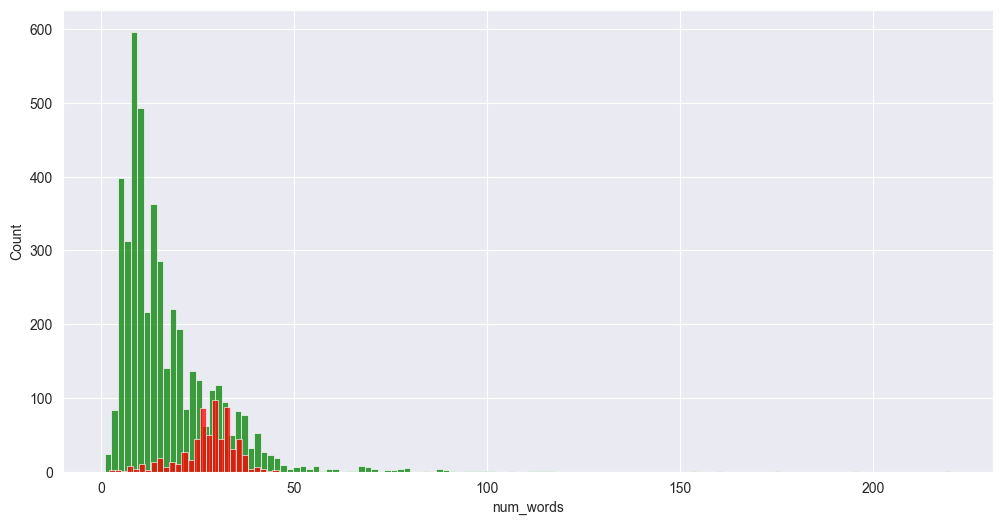

In [149]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['label'] == 'ham']['num_words'], color = 'green')
sns.histplot(data[data['label'] == 'spam']['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

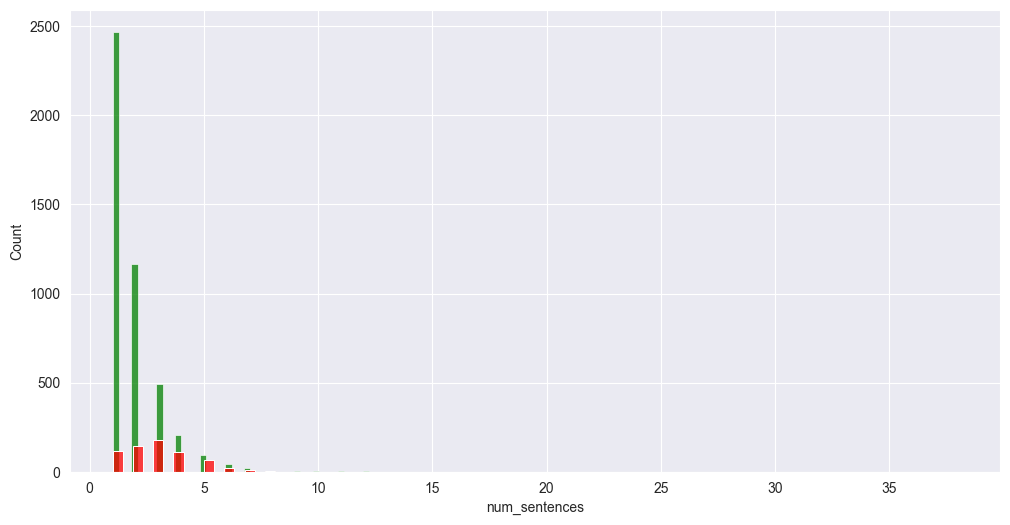

In [150]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['label'] == 'ham']['num_sentences'], color = 'green')
sns.histplot(data[data['label'] == 'spam']['num_sentences'], color = 'red')

In [151]:
from wordcloud import WordCloud

In [152]:
ham_msg_txt = data[data['label'] == 'ham']['message']
spam_msg_txt = data[data['label'] == 'spam']['message']


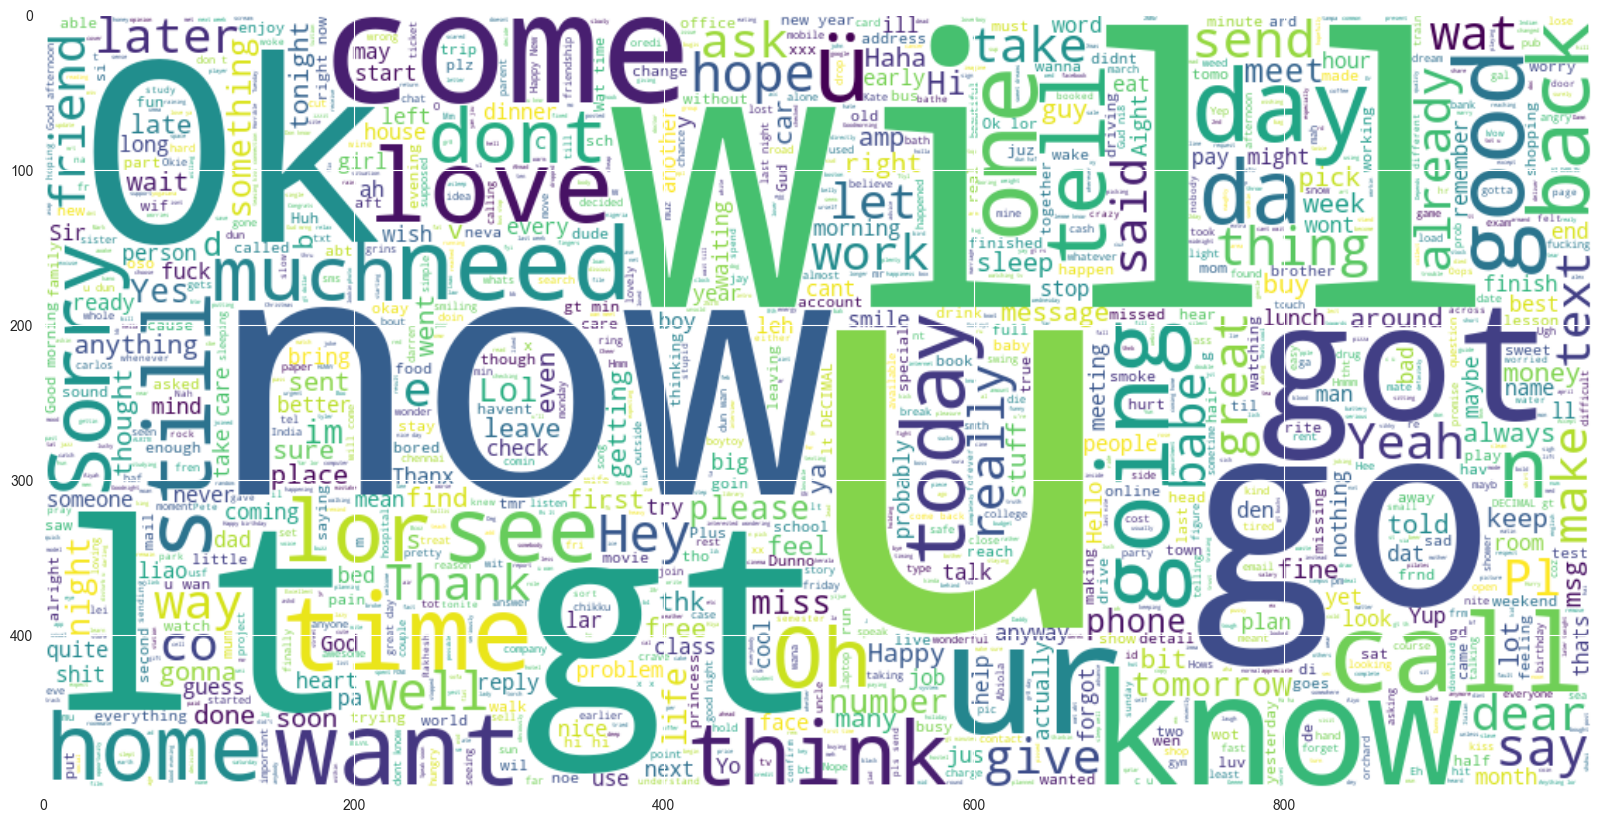

In [153]:
plt.figure(figsize = (20, 20))

wc = WordCloud(background_color='white', width=1000, height=500, max_words=2500).generate(" ".join(ham_msg_txt))
plt.imshow(wc, interpolation='bilinear')

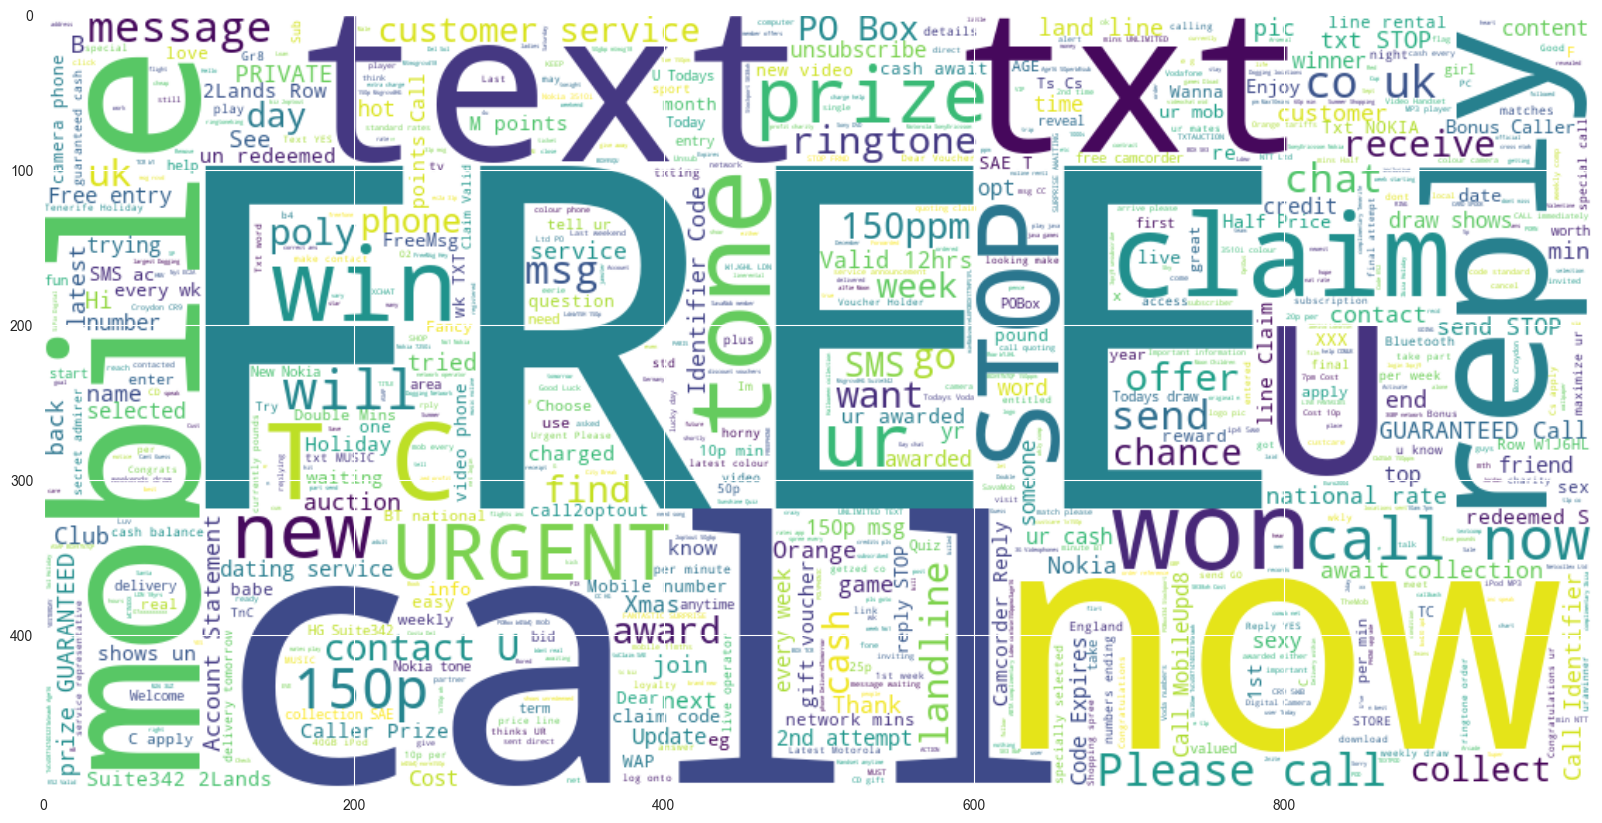

In [154]:
plt.figure(figsize = (20, 20))

wc = WordCloud(background_color='white', width=1000, height=500, max_words=2500).generate(" ".join(spam_msg_txt))
plt.imshow(wc, interpolation='bilinear')

## 2. Data Pre-processing

In [155]:
x = data['message'][5]
y = data['label'][5]

x, y

("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'spam')

#### Remove Punctuation

In [156]:
def remove_punctuation(text):
    trans = str.maketrans('', '', string.punctuation)
    return text.translate(trans)

In [157]:
data['message'] = data['message'].apply(remove_punctuation)

In [158]:
x = data['message'][5]
y = data['label'][5]

x, y

('FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send £150 to rcv',
 'spam')

#### Remove Special Characters

In [159]:
def remove_sp_ch(text):
    t = re.sub('[^a-zA-Z]', ' ', text)
    return t

In [160]:
data['message'] = data['message'].apply(remove_sp_ch)

In [161]:
x = data['message'][5]
y = data['label'][5]

x, y

('FreeMsg Hey there darling its been   weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send      to rcv',
 'spam')

#### Remove StopWords

In [162]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [163]:
len(sw)

198

In [164]:
def remove_sws(text):
    s = [word.lower() for word in text.split() if word not in sw]
    return " ".join(s)

In [165]:
data['message'] = data['message'].apply(remove_sws)

In [166]:
x = data['message'][5]
y = data['label'][5]

x, y

('freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send rcv',
 'spam')

## 3. Lemmatization

In [168]:
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

def lemma(text):
    l = [wn.lemmatize(word) for word in text.split()]
    return " ".join(l)

In [170]:
data['message'] = data['message'].apply(lemma)
data.head()

,label,message,num_character,num_words,num_sentences
0,ham,go jurong point crazy available bugis n great ...,111,24,2
1,ham,ok lar joking wif u oni,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,ham,u dun say early hor u c already say,49,13,1
4,ham,nah i dont think go usf life around though,61,15,1


In [171]:
x = data['message'][5]
y = data['label'][5]

x, y

('freemsg hey darling week word back id like fun still tb ok xxx std chgs send rcv',
 'spam')

## 5. Label Encoder

In [172]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['label'] = encoder.fit_transform(data['label'])

In [173]:
data.head()

,label,message,num_character,num_words,num_sentences
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah i dont think go usf life around though,61,15,1


In [176]:
data = data[['label', 'message']]
data.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah i dont think go usf life around though


## 6. Feature Extraction for Converting Word to Vectors

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=3000)

X = tf.fit_transform(data['message']).toarray()
y = data['label']

In [184]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [185]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((4135, 3000), (4135,), (1034, 3000), (1034,))

## 7. Model Training and Evaluation

In [200]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

In [201]:
clf = BernoulliNB()

In [202]:
clf.fit(Xtrain, ytrain)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [203]:
y_pred = clf.predict(Xtest)

In [204]:
print("Accuracy Score:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy Score: 0.9854932301740812
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       1.00      0.89      0.94       140

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [205]:
spam_recall = recall_score(ytest, y_pred, pos_label=1)
print(f"Spam Recall: {spam_recall:.4f}")

recall_per_class = recall_score(ytest, y_pred, average=None)
print(f"Ham Recall: {recall_per_class[0]:.4f}, Spam Recall: {recall_per_class[1]:.4f}")

Spam Recall: 0.8929
Ham Recall: 1.0000, Spam Recall: 0.8929


Text(120.72222222222221, 0.5, 'Actual')

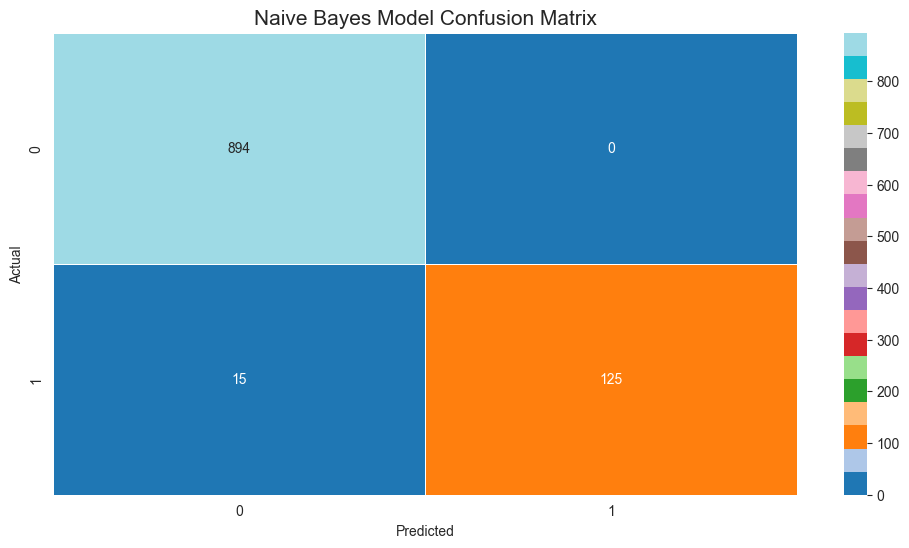

In [206]:
cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot=True, linewidths=0.5, fmt="d", cmap="tab20")
plt.title('Naive Bayes Model Confusion Matrix', size = 15)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 7. Saving the model

In [208]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))